### Visualize Generated EEGs ###

In [10]:
%matplotlib inline

In [8]:
import torch
import sys
import numpy as np
import mne
from mne.datasets import sample
import matplotlib.pyplot as plt
import h5py

In [5]:
sys.path.append("./forward_model/")
import stacklineplot

In [6]:
def load_eeg_file(filename):
    hdf = h5py.File(filename, "r")
    rec = hdf["record-0"]
    signals = rec["signals"]
    return signals

### Visualizations

In [212]:
i = 7

In [11]:
# plot 10s epochs (multiples in DE)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

n_sensors = 44
fs_gen = 200

electrode_labels = list(range(n_sensors))
ch0, ch1 = (0,19)
DE =5 # how many 10s epochs to display
epoch = 0; ptepoch = 10*int(fs_gen)
dp = 0 # int(0.5*ptepoch) # offset 
# print(np.shape(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp][1]))

#### A Real EEG

In [287]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(i) + "-real-rG-long.npy"

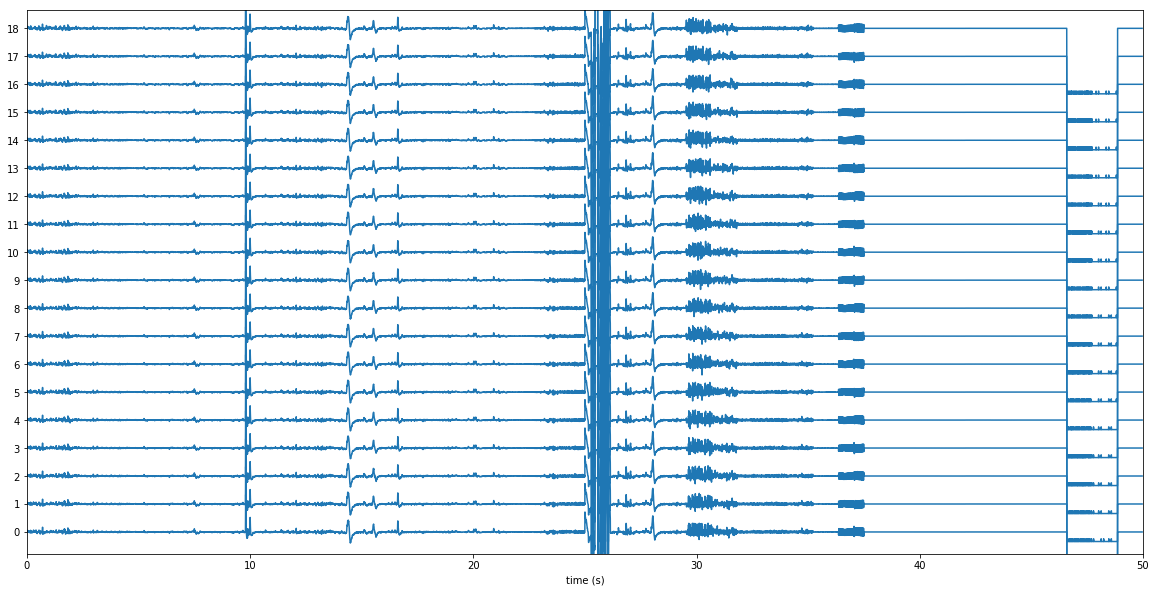

In [288]:
signals = np.load(filename).T
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=3.0)

Sample from one Epoch Before

In [285]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(i-1) + "-real-rG-long.npy"

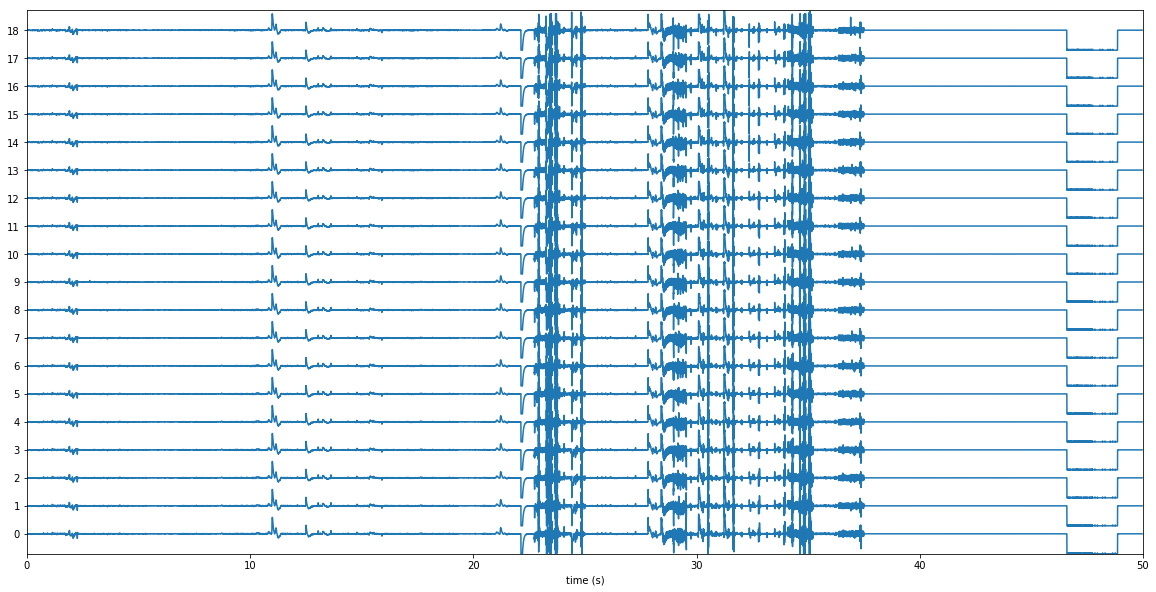

In [286]:
signals = np.load(filename).T
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=1)

In [265]:
signals[0][34]

-431.0

In [291]:
 a = np.hstack(signals[0])

(array([   22.,     0.,    14.,     0.,    19.,     0.,     0.,    16.,
            0.,    22.,     0.,    11.,     0.,     0.,    15.,     0.,
           15.,     0.,    35.,     0.,     0.,    34.,     0.,    50.,
            0.,    64.,     0.,     0.,    63.,     0.,    54.,     0.,
           60.,     0.,     0.,    60.,     0.,    75.,     0.,   114.,
            0.,     0.,   106.,     0.,   100.,     0.,     0.,  1213.,
            0.,    73.,     0.,    61.,     0.,     0.,    69.,     0.,
           72.,     0.,    37.,     0.,     0.,    30.,     0.,    20.,
            0.,    25.,     0.,     0.,    20.,     0.,    17.,     0.,
           17.,     0.,     0.,    17.,     0.,     8.,     0.,    16.,
            0.,     0.,    22.,     0.,    19.,     0.,    11.,     0.,
            0.,    24.,     0.,    16.,     0.,    20.]),
 array([-20.        , -19.57446809, -19.14893617, -18.72340426,
        -18.29787234, -17.87234043, -17.44680851, -17.0212766 ,
        -16.59574468, 

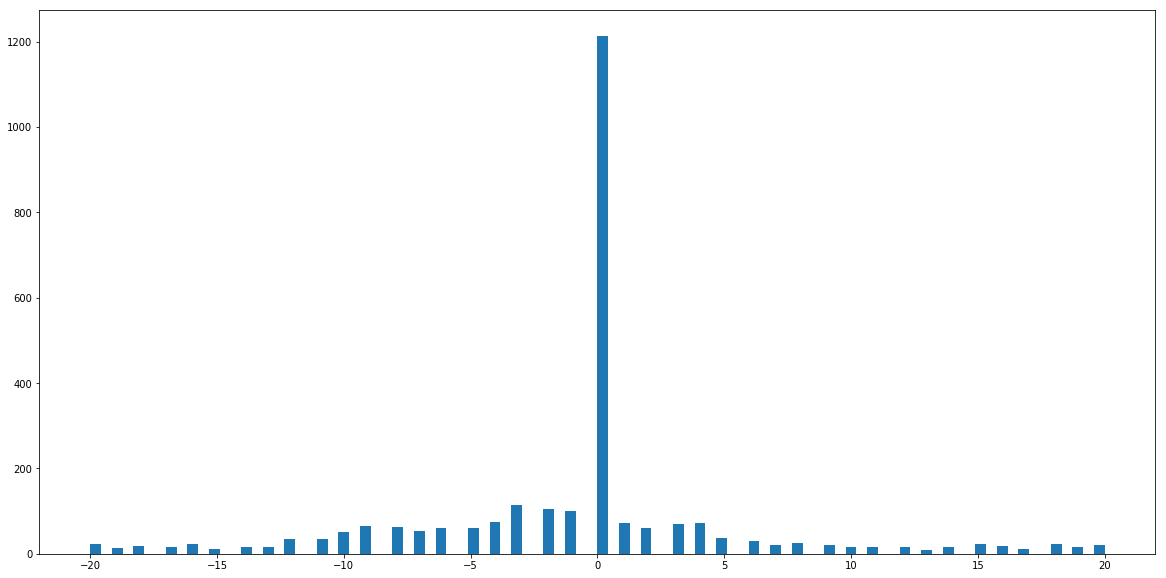

In [294]:
plt.hist(a, bins="auto",range=(-20,20))

#### A Fake EEG

In [276]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-"+ str(8) + "-fake-rG-cont.npy"

In [298]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(0) + "-fake-rG-long.npy"

In [307]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-3-fake-rG-short-fact.npy"

In [314]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(29) + "-fake-rcG-short.npy"

In [347]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(2) + "-fake-cG-matching-minB.npy"

In [40]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(4) + "-fake-conv-A.npy"

In [41]:
signals = np.load(filename).T

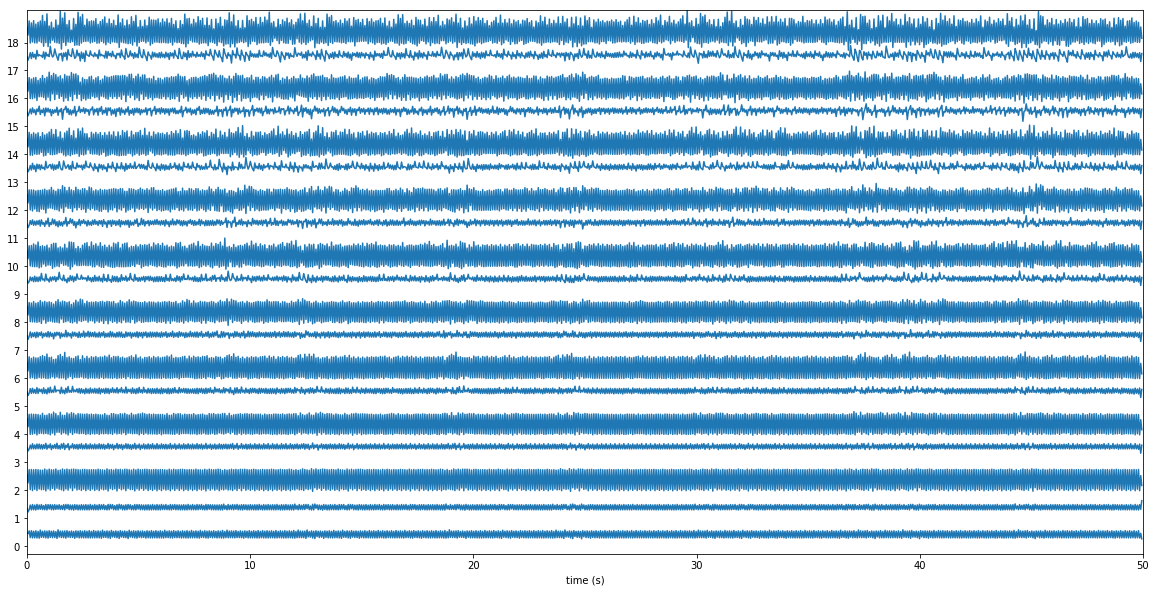

In [42]:
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=1.0)

(array([   8.,    5.,   15.,   13.,   33.,   49.,   89.,   85.,   89.,
         108.,  116.,   94.,   97.,   74.,   43.,   29.,   24.,   17.,
           8.,    2.,    2.]),
 array([-0.59198111, -0.52384092, -0.45570072, -0.38756052, -0.31942032,
        -0.25128013, -0.18313993, -0.11499973, -0.04685953,  0.02128066,
         0.08942086,  0.15756106,  0.22570126,  0.29384145,  0.36198165,
         0.43012185,  0.49826204,  0.56640224,  0.63454244,  0.70268264,
         0.77082283,  0.83896303]),
 <a list of 21 Patch objects>)

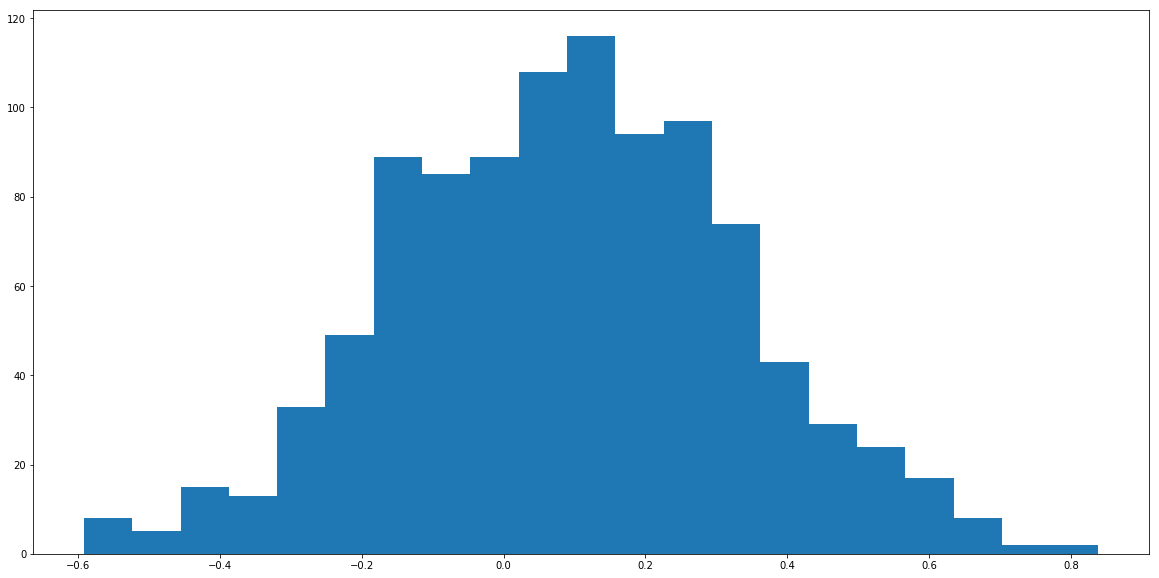

In [310]:
plt.hist(np.hstack(signals[0]), bins="auto")

With norm

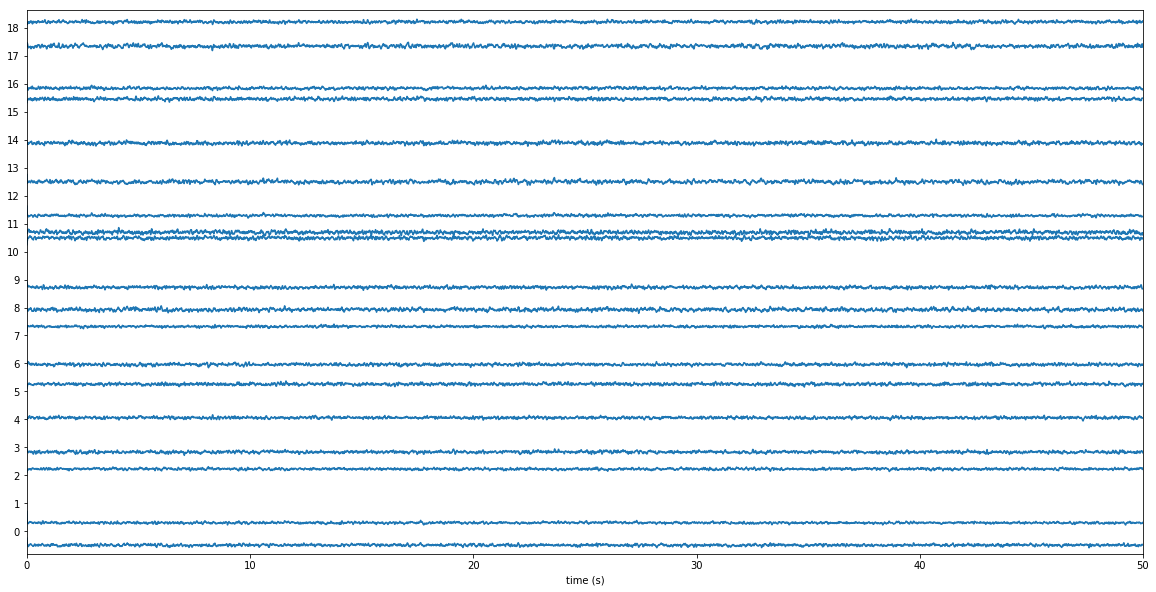

In [252]:
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=1)

In [195]:
filename = "/Users/DanielLongo/server/mnt/data1/eegdbs/SEC-0.1/stanford/ZA00701S_1-1+.eeghdf"
# filename = "/Users/DanielLongo 1/Desktop/eegML/eeg-hdfstorage/data/spasms.eeghdf"

# "/Users/DanielLongo 1/server/mnt/data1/eegdbs/SEC-0.1/stanford/ZA00701S_1-1+.eeghdf"

In [196]:
open(filename)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/DanielLongo/server/mnt/data1/eegdbs/SEC-0.1/stanford/ZA00701S_1-1+.eeghdf'

In [17]:
signals = load_eeg_file(filename)

In [19]:
signals

<HDF5 dataset "signals": shape (36, 446000), type "<i2">

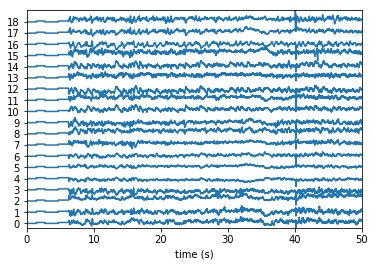

In [29]:
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=2)

### Old

In [ ]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(i) + suffix + ".npy"

In [90]:
hf = h5py.File('data1.h5', 'w')

In [91]:
signals = hf.create_dataset('generated', data=generated)

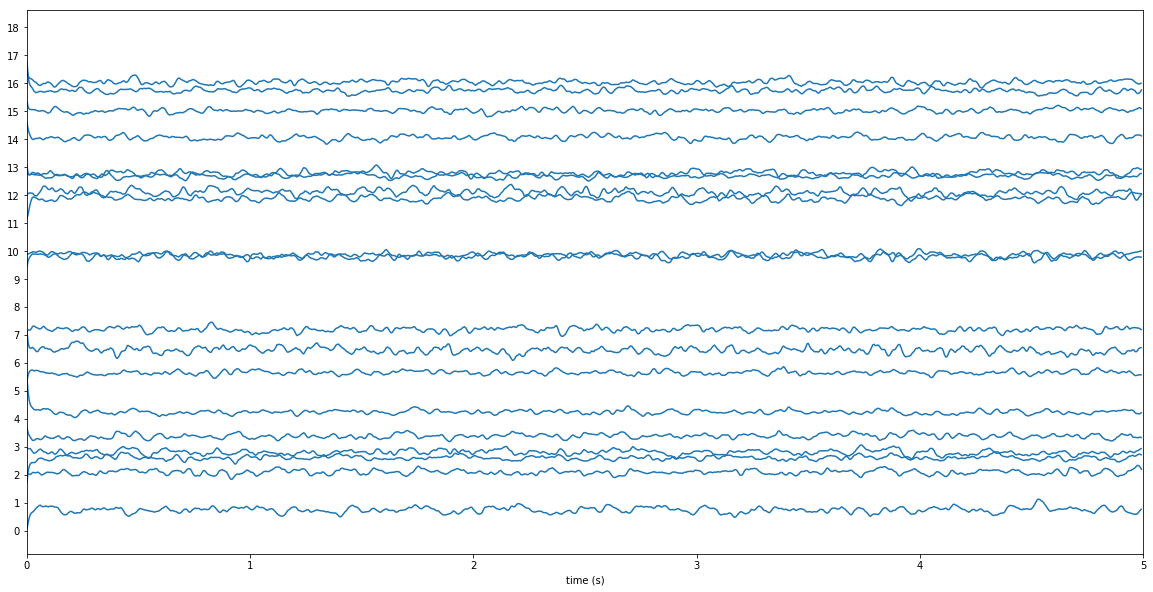

In [92]:
stacklineplot.show_epoch_centered(signals, 0,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=200,
                        ylabels=list(range(n_sensors)), yscale=3.0)